In [1]:
import requests
import pandas as pd
import plotly.express as px

In [2]:
version = '10.16.1'
path = f'https://ddragon.leagueoflegends.com/cdn/{version}/data/en_US/champion.json'

In [3]:
r = requests.get(path)
data = r.json()['data']

In [4]:
df = pd.DataFrame.from_dict(data, orient='index', columns=['key', 'info'])

In [5]:
aatrox = pd.DataFrame(df.loc['Aatrox']['info'], index=['r']).T.reset_index()

fig = px.line_polar(aatrox, r='r', theta='index', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(title='Aatrox', xaxis_title=None,
                  yaxis_title=None, title_x=0.5,
                  font=dict(size=17)) # paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
fig.show()
fig.write_image("images/aatrox.png", scale=5)

c:\Application\Tools\conda\envs\optidraft\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


In [6]:
annie = pd.DataFrame(df.loc['Annie']['info'], index=['r']).T.reset_index()

fig = px.line_polar(annie, r='r', theta='index', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(title='Annie', xaxis_title=None,
                  yaxis_title=None, title_x=0.5,
                  font=dict(size=17)) # paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)'
fig.show()
fig.write_image("images/annie.png", scale=5)

c:\Application\Tools\conda\envs\optidraft\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



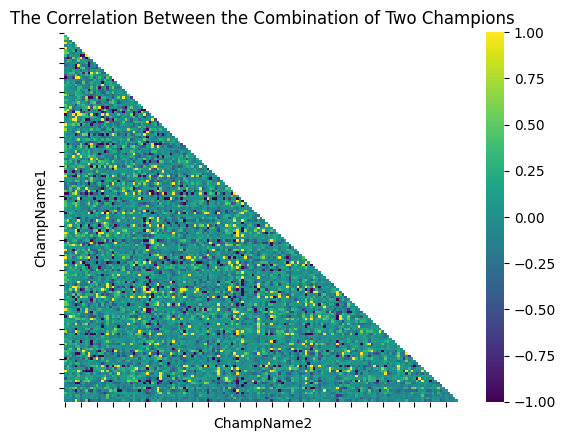

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/synergy.csv')

corr_matrix = df.pivot(index='champId1', columns='champId2', values='synergy_score')
heatmap = sns.heatmap(corr_matrix, cmap='viridis', annot=False, mask=np.triu(np.ones_like(corr_matrix)), vmin=-1, vmax=1)
# Hide the x-axis and y-axis labels
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.title('The Correlation Between the Combination of Two Champions')
heatmap.set_xlabel("ChampName2")
heatmap.set_ylabel("ChampName1")
plt.show()

c:\Application\Tools\conda\envs\optidraft\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

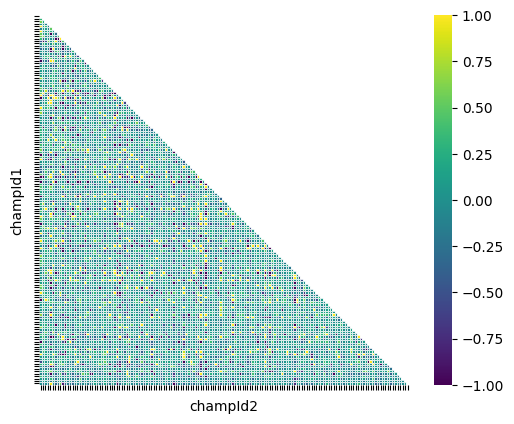

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('data/synergy.csv')

corr_matrix = df.pivot(index='champId1', columns='champId2', values='synergy_score')
# Replace NaN values with 0
corr_matrix = corr_matrix.fillna(0)

# Perform clustering using K-means
kmeans = KMeans(n_clusters=3)  # Choose the desired number of clusters
clusters = kmeans.fit_predict(corr_matrix)

# Plot the clustered heatmap
heatmap = sns.heatmap(corr_matrix, cmap='viridis', annot=False, mask=np.triu(np.ones_like(corr_matrix)), vmin=-1, vmax=1)
# Highlight the clusters with different colors
sns.heatmap(corr_matrix, annot=False, mask=np.triu(np.ones_like(corr_matrix)), vmin=-1, vmax=1,
            cbar=False, square=True, linewidths=0.5, linecolor='white', cmap='viridis', alpha=0.8,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cbar_kws={'ticks': []})
# Hide the x-axis and y-axis labels
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# Add cluster labels as annotations

print(clusters)
for i in range(len(clusters)):
    for j in range(len(clusters)):
        plt.text(j + 0.5, i + 0.5, str(clusters[i]), ha='center', va='center')

plt.title('Clustering of Champions Synergy')
heatmap.set_xlabel("ChampName2")
heatmap.set_ylabel("ChampName1")
plt.show()
